# 1. Import necessary packages and set path of files

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

%matplotlib inline


In [3]:
%pwd


'D:\\Python\\DataScience\\DataScience6105\\Project'

In [2]:
path = 'D:\\Python\\DataScience\\DataScience6105\\Project'


# 2. Preprocess data
### Read data from trains.csv, features.csv, stores.csv and merge them into dataTrain variable. 

In [3]:
dataTrain = pd.read_csv(f'{path}/train.csv', header=0, names=['Store','Dept','Date','weeklySales','isHoliday'], sep=',')
features = pd.read_csv(f'{path}/features.csv', header=0, names=['Store','Date','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','IsHoliday'], sep=',').drop(columns=['IsHoliday'])
stores = pd.read_csv(f'{path}/stores.csv', header=0, names=['Store','Type','Size'], sep=',')
dataTrain = dataTrain.merge(stores, how='left').merge(features, how='left')

print(dataTrain.shape)
dataTrain.head(5)


C:\Users\Zhou\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:946: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


(421570, 16)


,Store,Dept,Date,weeklySales,isHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,NaN,NaN,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,NaN,NaN,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,NaN,NaN,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,NaN,NaN,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,NaN,NaN,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


### Fill NAN in dataTrain  

In [4]:
dataTrain = pd.get_dummies(dataTrain, columns=['Type'])
dataTrain[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataTrain[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataTrain = dataTrain.fillna(0)
dataTrain['Month'] = pd.to_datetime(dataTrain['Date']).dt.month
dataTrain = dataTrain.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])

print(dataTrain.shape)
dataTrain.head(5)


(421570, 11)


,Store,Dept,weeklySales,isHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month
0,1,1,24924.50,False,0,42.31,0.0,0.0,0.0,0.0,2
1,1,1,46039.49,True,0,38.51,0.0,0.0,0.0,0.0,2
2,1,1,41595.55,False,0,39.93,0.0,0.0,0.0,0.0,2
3,1,1,19403.54,False,0,46.63,0.0,0.0,0.0,0.0,2
4,1,1,21827.90,False,0,46.50,0.0,0.0,0.0,0.0,3


### Read data from test.csv and merge data into dataTest variable. Fill NAN in dataTest.

In [33]:
dataTest = pd.read_csv(f'{path}/test.csv', header=0, names=['Store','Dept','Date','isHoliday'], sep=',')
dataTest = dataTest.merge(stores, how='left').merge(features, how='left')
dataTest = pd.get_dummies(dataTest, columns=['Type'])
dataTest[['MarkDown1','MarkDown2','MarkDown3','MarkDown4', 'MarkDown5']] = dataTest[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].fillna(0)
dataTest = dataTest.fillna(0)
columnDate = dataTest['Date']
dataTest['Month'] = pd.to_datetime(dataTest['Date']).dt.month
dataTest = dataTest.drop(columns=["Date", "CPI", "Fuel_Price", 'Unemployment', 'MarkDown3'])

print(dataTest.shape)
dataTest.head(5)


C:\Users\Zhou\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:946: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  'representation', UserWarning)


(115064, 10)


,Store,Dept,isHoliday,Size,Temperature,MarkDown1,MarkDown2,MarkDown4,MarkDown5,Month
0,1,1,False,0,55.32,6766.44,5147.70,3639.90,2737.42,11
1,1,1,False,0,61.24,11421.32,3370.89,4646.79,6154.16,11
2,1,1,False,0,52.92,9696.28,292.10,1133.15,6612.69,11
3,1,1,True,0,56.23,883.59,4.17,209.91,303.32,11
4,1,1,False,0,52.34,2460.03,0.00,150.57,6966.34,11


# 3. Train and predict by different models
### Split dataTrain into train_x, train_y and try to use knn at first.

In [16]:
train_x = dataTrain.drop(columns=['weeklySales'])
train_y = dataTrain['weeklySales']


In [ ]:
knn = KNeighborsRegressor(weights='uniform', n_neighbors=10)
knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)


In [26]:
predict_y = pd.Series(predict_y)
print(predict_y)


0         35044.411
1         46500.340
2         46014.744
3         34776.861
4         34405.995
5         43483.499
6         35288.941
7         30307.583
8         49918.497
9         38978.062
10        34965.403
11        39314.415
12        28553.608
13        39106.403
14        34257.569
15        30912.036
16        31417.212
17        31809.141
18        31809.141
19        25879.314
20        25567.085
21        31910.705
22        31910.705
23        23987.439
24        23238.312
25        24620.655
26        26104.824
27        26104.824
28        26191.984
29        26423.216
            ...    
421540    17326.403
421541    15760.350
421542    16067.473
421543    15596.249
421544    16846.948
421545    16705.824
421546    16667.323
421547    16601.056
421548    16104.600
421549    17618.314
421550    18090.447
421551    16540.154
421552    16544.303
421553    17924.022
421554    16941.335
421555    16327.643
421556    15723.830
421557    16671.693
421558    16818.184


### Split train_x, train_y into small size. Prepare to use train_x_split, train_y_split to optimize hyperparameters.

In [18]:
x_split, train_x_split, y_split, train_y_split = train_test_split(train_x, train_y, test_size=0.024, random_state=0)
print(train_x_split.shape, train_y_split.shape, x_split.shape, y_split.shape)


(10118, 10) (10118,) (411452, 10) (411452,)


### Split train_x, train_y into train part and valid part. Prepare to use valid part to compare predict_y with valid_y and achieve errors.

In [19]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.24, random_state=0)
print(valid_x.shape, valid_y.shape)


(101177, 10) (101177,)


## (1) KNN model
### Tune n_neighbors, weights, algorithm, leaf_size hyperparameters. Use GridSearchCV with 5 cross validation. During this process, use mean_absolute_error as a measure parameter.  
### Find best estimator and best score in KNN model.

In [11]:
knn = KNeighborsRegressor()
k_range = list(range(1,10))
leaf_range = list(range(1,2))
weight_options = ['uniform','distance']
algorithm_options = ['auto','ball_tree','kd_tree','brute']
paramGridKnn = dict(n_neighbors = k_range,weights = weight_options,algorithm=algorithm_options,leaf_size=leaf_range)

%time
gridKnn = GridSearchCV(knn,paramGridKnn,cv=5,verbose=1,n_jobs=-1,scoring='neg_mean_absolute_error')
gridKnn.fit(train_x_split, train_y_split)
print(gridKnn.best_estimator_)
print(gridKnn.best_score_)


Wall time: 0 ns
Fitting 5 folds for each of 72 candidates, totalling 360 fits
KNeighborsRegressor(algorithm='auto', leaf_size=1, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')
-13848.985032505328


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   38.8s finished


### Use best estimator of KNN and train data(train_x, train_y) to fit the KNN model. 

In [20]:
knn = KNeighborsRegressor(leaf_size=1, n_jobs=-1, n_neighbors=9, weights='uniform')
knn.fit(train_x, train_y)
print(train_x.shape, train_y.shape)


(320393, 10) (320393,)


### Predict pred_y by valid data(valid_x) and compare it with real data(valid_y).
### Calculate mean absolute error and mean squared error.

In [21]:
pred_y = pd.Series(knn.predict(valid_x))
print(pred_y)
print(mean_absolute_error(valid_y, pred_y))
print(mean_squared_error(valid_y, pred_y))


0          9416.720000
1         20779.228889
2           991.818889
3           528.131111
4          2692.280000
5          2211.294444
6          6578.207778
7          9473.086667
8          8276.484444
9          1011.378889
10         2753.304444
11        25649.082222
12         4218.046667
13        27489.991111
14        20683.005556
15         1393.104444
16         6261.768889
17         4550.918889
18         7590.698889
19         3549.062222
20        25546.351111
21         7264.814444
22          166.995556
23        49811.320000
24        16262.188889
25        27474.627778
26        35076.960000
27        23529.950000
28        68373.637778
29          693.522222
              ...     
101147    14363.985556
101148    36759.043333
101149    14158.751111
101150     3270.166667
101151    17355.061111
101152     8624.841111
101153    23192.152222
101154     3712.288889
101155     2016.710000
101156    21450.644444
101157     2063.204444
101158     4297.422222
101159     

### Predict y value using test data and get output.

In [34]:
predict_y = pd.Series(knn.predict(dataTest))


In [35]:
dataOutput = dataTest
dataOutput['WeeklySales'] = predict_y
dataOutput['Date'] = columnDate
dataOutput['Id'] = dataOutput['Store'].astype(str) + '_' +  dataOutput['Dept'].astype(str) + '_' +  dataOutput['Date'].astype(str)
dataOutput = dataOutput[['Id', 'WeeklySales']]
print(dataOutput)


                      Id   WeeklySales
0         1_1_2012-11-02  12519.847778
1         1_1_2012-11-09  12235.064444
2         1_1_2012-11-16  23666.962222
3         1_1_2012-11-23  10679.366667
4         1_1_2012-11-30  24955.297778
5         1_1_2012-12-07  26630.873333
6         1_1_2012-12-14  43094.551111
7         1_1_2012-12-21  16121.767778
8         1_1_2012-12-28  14331.158889
9         1_1_2013-01-04  14955.776667
10        1_1_2013-01-11  12495.694444
11        1_1_2013-01-18   7678.696667
12        1_1_2013-01-25  13227.120000
13        1_1_2013-02-01  33928.334444
14        1_1_2013-02-08  46524.003333
15        1_1_2013-02-15  13939.505556
16        1_1_2013-02-22  30236.866667
17        1_1_2013-03-01  28383.317778
18        1_1_2013-03-08  26912.812222
19        1_1_2013-03-15  16347.048889
20        1_1_2013-03-22  15734.257778
21        1_1_2013-03-29  24547.067778
22        1_1_2013-04-05  21594.076667
23        1_1_2013-04-12  20515.292222
24        1_1_2013-04-19 

# (2) RandomForest model
### Tune n_estimators, criterion, min_samples_leaf hyperparameters. Use GridSearchCV with 5 cross validation. During this process, use mean_absolute_error as a measure parameter.  
### Find best estimator and best score in RandomForest model.

In [18]:
rf = RandomForestRegressor()
n_range = list(range(10, 31, 5))
criterion_options = ['mse','mae']
min_samples_leaf_options = list(range(2,7,2))
paramGridRf = dict(n_estimators=n_range, criterion=criterion_options, min_samples_leaf=min_samples_leaf_options)

%time
gridRf = GridSearchCV(rf,paramGridRf,cv=5,verbose=1,n_jobs=-1,scoring='neg_mean_absolute_error')
gridRf.fit(train_x_split, train_y_split)
print(gridRf.best_estimator_)
print(gridRf.best_score_)


Wall time: 0 ns
Fitting 5 folds for each of 30 candidates, totalling 150 fits
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
-6052.189348497242


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 16.6min finished


### Use best estimator of RandomForest and train data(train_x, train_y) to fit the RandomForest model. 

In [ ]:
rf = RandomForestRegressor(n_estimators=30, criterion='mae',min_samples_leaf=2)
rf.fit(train_x, train_y)


### Predict pred_y by valid data(valid_x) and compare it with real data(valid_y).
### Calculate mean absolute error and mean squared error.

In [19]:
pred_y = pd.Series(rf.predict(valid_x))
print(pred_y)
print(mean_absolute_error(valid_y, pred_y))
print(mean_squared_error(valid_y,pred_y))


0          9831.559770
1         22471.687778
2           510.836524
3           484.807833
4            18.384659
5          1602.395878
6          3202.361306
7          3205.098591
8          4907.381748
9            69.881250
10         1884.592328
11        37920.365595
12          197.986217
13        26988.186727
14        15291.389044
15         1940.492375
16         7700.155481
17           68.470817
18           78.296626
19         1217.120400
20        36079.047306
21        31248.473410
22          322.314989
23        39988.659771
24        30456.614606
25         8196.796817
26        45570.803192
27        56472.125591
28        33961.592350
29          740.254395
              ...     
101147    45838.561225
101148     7862.381257
101149    16012.413445
101150     3136.270573
101151    30988.373930
101152     8110.012011
101153     3055.664283
101154     1593.351128
101155     3782.486951
101156    10424.921088
101157      945.435889
101158    12311.384561
101159     

### Predict y value using test data and get output.

In [20]:
predict_y = pd.Series(rf.predict(dataTest))
dataOutput = dataTest
dataOutput['WeeklySales'] = predict_y
dataOutput['Date'] = columnDate
dataOutput['Id'] = dataOutput['Store'].astype(str) + '_' +  dataOutput['Dept'].astype(str) + '_' +  dataOutput['Date'].astype(str)
dataOutput = dataOutput[['Id', 'WeeklySales']]
print(dataOutput)


                      Id   WeeklySales
0         1_1_2012-11-02  28765.240979
1         1_1_2012-11-09  28459.853322
2         1_1_2012-11-16  28765.240979
3         1_1_2012-11-23  28675.598026
4         1_1_2012-11-30  30437.471904
5         1_1_2012-12-07  23778.870372
6         1_1_2012-12-14  29977.091120
7         1_1_2012-12-21  28702.042715
8         1_1_2012-12-28  28052.408638
9         1_1_2013-01-04  21791.863964
10        1_1_2013-01-11  18969.467325
11        1_1_2013-01-18  23799.113634
12        1_1_2013-01-25  18748.345242
13        1_1_2013-02-01  19538.728712
14        1_1_2013-02-08  19465.647629
15        1_1_2013-02-15  19264.441240
16        1_1_2013-02-22  19053.919017
17        1_1_2013-03-01  19580.609879
18        1_1_2013-03-08  19580.609879
19        1_1_2013-03-15  21919.978060
20        1_1_2013-03-22  22033.212949
21        1_1_2013-03-29  19289.122323
22        1_1_2013-04-05  19289.122323
23        1_1_2013-04-12  21063.817051
24        1_1_2013-04-19 

# (3) ExtraTrees Model
### Use hyperparameters setting manually. Use train data(train_x, train_y) to fit the ExtraTrees model. 

In [9]:
%time
et = ExtraTreesRegressor(n_estimators=100,verbose=1,n_jobs=-1)
et.fit(train_x, train_y)


Wall time: 0 ns


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                    oob_score=False, random_state=None, verbose=1,
                    warm_start=False)

### Predict pred_y by valid data(valid_x) and compare it with real data(valid_y).
### Calculate mean absolute error and mean squared error.

In [10]:
pred_y = pd.Series(et.predict(valid_x))
print(pred_y)
print(mean_absolute_error(valid_y, pred_y))
print(mean_squared_error(valid_y,pred_y))


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   24.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:   33.0s finished


0         10305.2684
1         25494.2228
2           278.7024
3           461.4720
4             4.6494
5           876.7376
6          2429.1632
7          2805.3606
8          6323.6156
9            72.5012
10         1923.2784
11        40528.6114
12          118.6340
13        34816.3682
14        42223.0280
15         1368.3474
16         8181.2496
17          144.4972
18           20.8579
19          819.6880
20        28252.3623
21        34613.6087
22           32.3087
23        33043.1480
24        30436.2391
25         7915.5263
26        43893.0980
27        55983.5507
28        34148.3047
29          266.6138
             ...    
101147    59910.8751
101148    17228.8106
101149    15505.5816
101150     2377.8745
101151    17837.0230
101152     7007.5151
101153     5221.7048
101154     2487.4537
101155     3311.5270
101156    34732.5944
101157     1198.7896
101158     3275.0542
101159      529.2041
101160    26235.7140
101161     4674.0776
101162    43320.1911
101163      1

### Predict y value using test data and get output.

In [17]:
predict_y = pd.Series(et.predict(dataTest))
dataOutput = dataTest
dataOutput['WeeklySales'] = predict_y
dataOutput['Date'] = columnDate
dataOutput['Id'] = dataOutput['Store'].astype(str) + '_' +  dataOutput['Dept'].astype(str) + '_' +  dataOutput['Date'].astype(str)
dataOutput = dataOutput[['Id', 'WeeklySales']]
print(dataOutput)


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    9.1s finished


                      Id  WeeklySales
0         1_1_2012-11-02   26230.7657
1         1_1_2012-11-09   22653.4235
2         1_1_2012-11-16   26529.6714
3         1_1_2012-11-23   23836.4228
4         1_1_2012-11-30   27757.9928
5         1_1_2012-12-07   35890.2068
6         1_1_2012-12-14   27825.4362
7         1_1_2012-12-21   31409.1384
8         1_1_2012-12-28   23352.3515
9         1_1_2013-01-04   19410.5289
10        1_1_2013-01-11   18547.6476
11        1_1_2013-01-18   18058.5872
12        1_1_2013-01-25   18067.7606
13        1_1_2013-02-01   28886.6875
14        1_1_2013-02-08   32393.4704
15        1_1_2013-02-15   37524.3035
16        1_1_2013-02-22   27064.4748
17        1_1_2013-03-01   25980.3850
18        1_1_2013-03-08   23485.5407
19        1_1_2013-03-15   22702.7227
20        1_1_2013-03-22   30450.7098
21        1_1_2013-03-29   29300.2291
22        1_1_2013-04-05   28861.6140
23        1_1_2013-04-12   31682.6893
24        1_1_2013-04-19   18500.6708
25        1_

# 4. Compare errors and present them in pictures
### Mean absolute error comparison

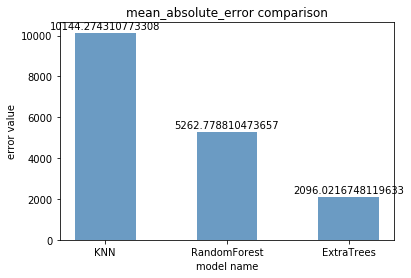

In [7]:
x_data = ['KNN', 'RandomForest', 'ExtraTrees']
y_data = [10144.274310773308, 5262.778810473657, 2096.0216748119633]
y_data_2 = [296059497.6182222, 110148527.76437865, 29008643.0901295]

plt.bar(x=x_data,height=y_data,width=0.5,color='steelblue',alpha=0.8)
for x, y in enumerate(y_data):
    plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
plt.title('mean_absolute_error comparison')
plt.xlabel('model name')
plt.ylabel('error value')
plt.show()


### Mean squared error comparison

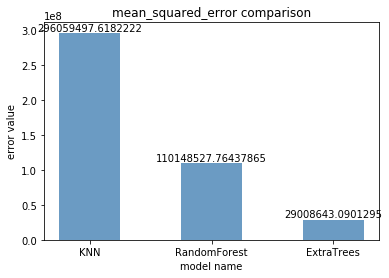

In [8]:
x_data = ['KNN', 'RandomForest', 'ExtraTrees']
y_data = [10144.274310773308, 5262.778810473657, 2096.0216748119633]
y_data_2 = [296059497.6182222, 110148527.76437865, 29008643.0901295]

plt.bar(x=x_data,height=y_data_2,width=0.5,color='steelblue',alpha=0.8)
for x, y in enumerate(y_data_2):
    plt.text(x, y + 100, '%s' % y, ha='center', va='bottom')
plt.title('mean_squared_error comparison')
plt.xlabel('model name')
plt.ylabel('error value')
plt.show()